In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [2]:
# 设置参数
sc.settings.verbosity = 4
sc._settings.ScanpyConfig.n_jobs = -1
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=600,
    facecolor="white",
    frameon=False,  # remove frame
)

# 8.paga-轨迹分析

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:02:30)


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


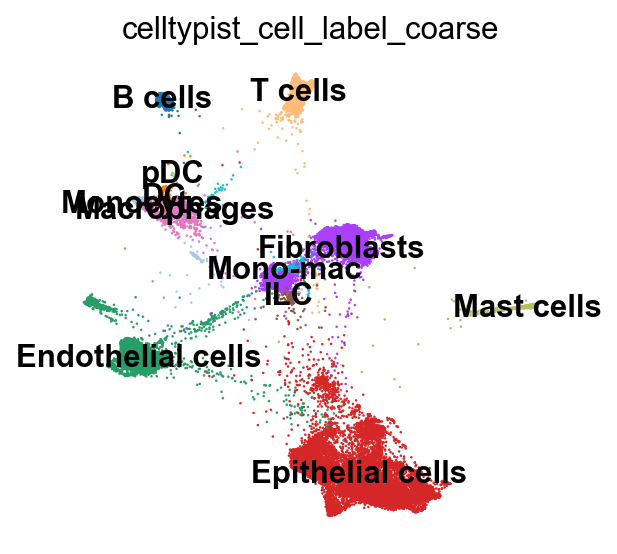

In [3]:
adata = sc.read("anndata_celltypist_anno.h5ad")
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color='celltypist_cell_label_coarse', legend_loc='on data', save = '08-paga-1.pdf')

computing Diffusion Maps using n_comps=15(=n_dcs)
        initialized `.distances` `.connectivities` 
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99727756 0.9964373  0.99567646 0.99406606 0.99399954
     0.99218273 0.99171066 0.9806782  0.97576433 0.9736686  0.9720855
     0.96858877 0.96287185 0.95779276]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:01)
computing neighbors
        initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
    computing neighbors


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    computed neighbors (0:00:16)
    computed connectivities (0:00:03)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:02:47)


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


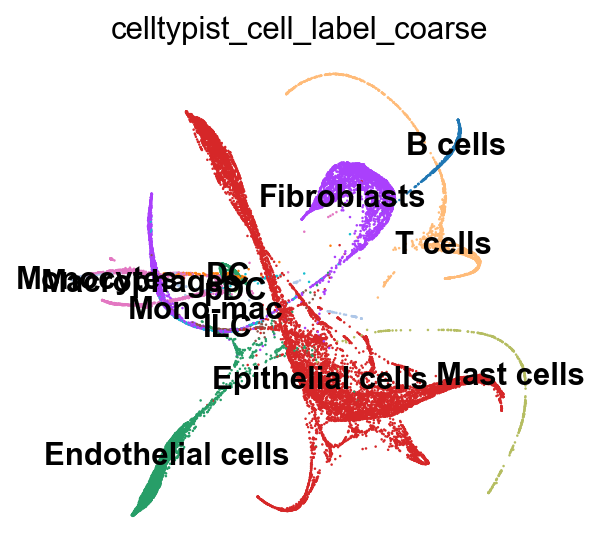

In [4]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=15, use_rep="X_diffmap")
sc.tl.draw_graph(adata)
sc.pl.draw_graph(
    adata,
    color="celltypist_cell_label_coarse",
    legend_loc="on data",
    save="08-paga-2.pdf",
)

running PAGA
        initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


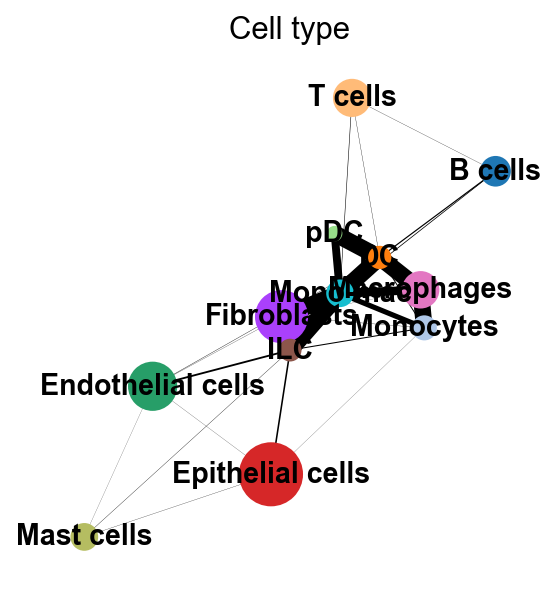

In [5]:
sc.tl.paga(adata, groups="celltypist_cell_label_coarse")
sc.pl.paga(
    adata,
    color=[
        "celltypist_cell_label_coarse",
        #  'ENSMUSG00000023274', 'ENSMUSG00000053977'
    ],
    title=["Cell type", "CD4", "Cd8a"],
    save="08-paga-3.pdf",
)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:02:56)


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


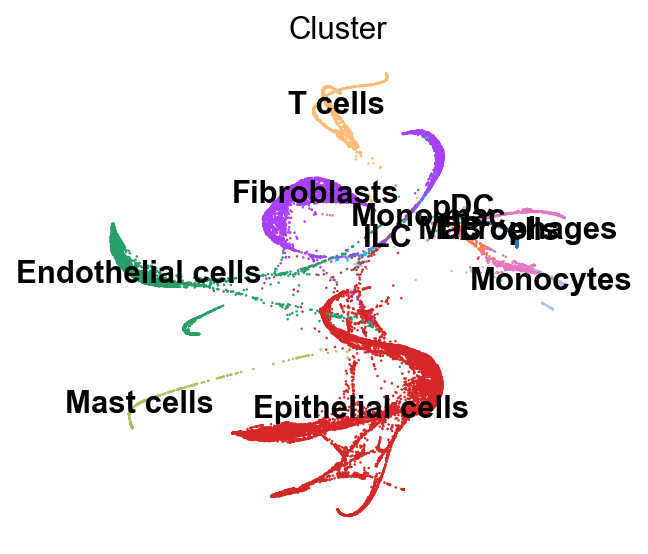

In [6]:
sc.tl.draw_graph(adata, init_pos="paga")
sc.pl.draw_graph(
    adata,
    color=["celltypist_cell_label_coarse"],
    title=["Cluster"],
    legend_loc="on data",
    save="08-paga-3.pdf",
)
# sc.pl.draw_graph(adata, color=['genotype'], title=['Genotype'], save = 'Plot6.png')
# sc.pl.draw_graph(adata, color=['ENSMUSG00000023274', 'ENSMUSG00000053977'], title=['CD4', 'Cd8a'], save = 'Plot7.png')

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


    Graph has more than a single connected component. To restrict to this component, pass `single_component=True`.
--> added 'pos', the PAGA positions (adata.uns['paga'])


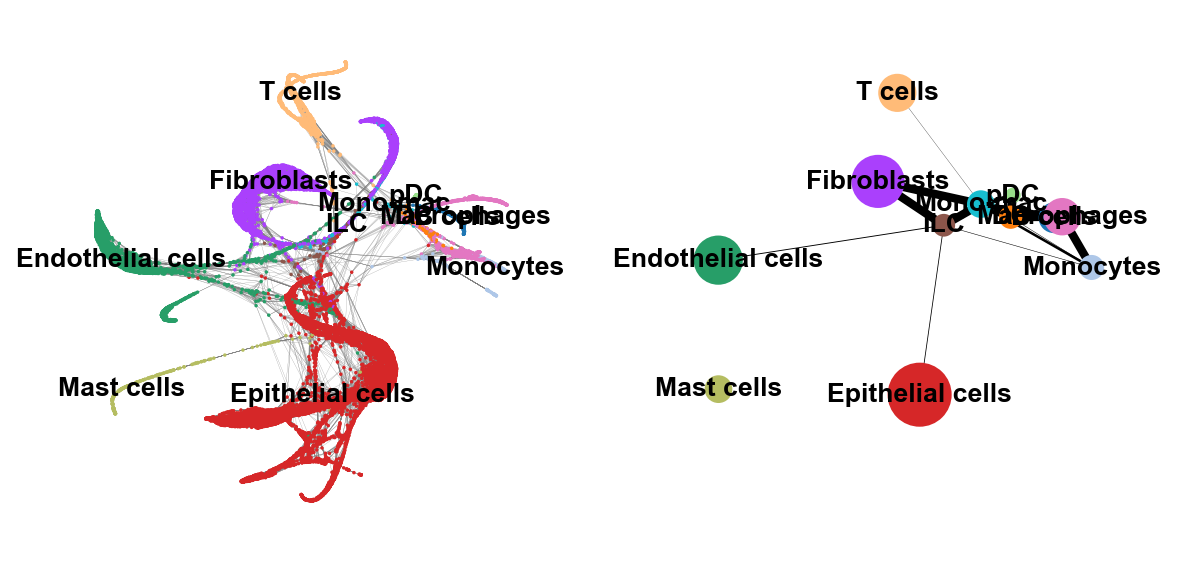

In [7]:
sc.pl.paga_compare(
    adata, threshold=0.03, 
    title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True,
    save=True)

        initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


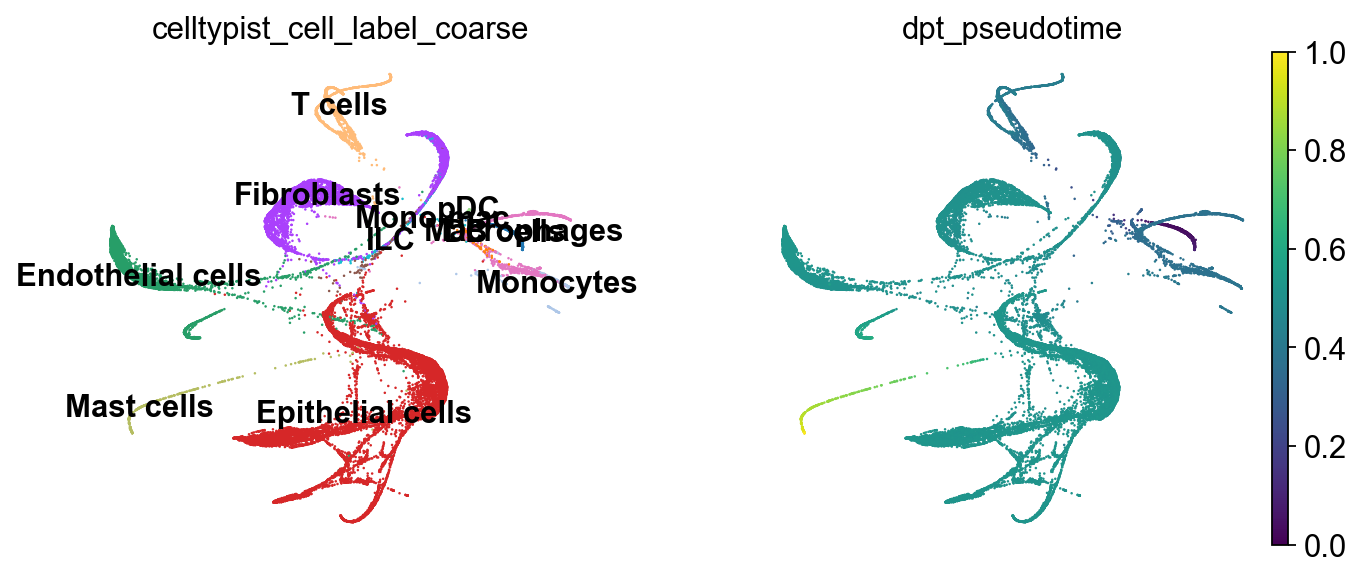

In [8]:
adata.uns["iroot"] = np.flatnonzero(
    adata.obs["celltypist_cell_label_coarse"] == "B cells"
)[0]
sc.tl.dpt(adata)
sc.pl.draw_graph(
    adata,
    color=["celltypist_cell_label_coarse", "dpt_pseudotime"],
    legend_loc="on data",
    save="08-paga-2.pdf",
)

In [9]:
adata.write('anndata_trajectory.h5ad')